In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def insert_random_missing_values(df, missing_fraction=0.1):
    """
    Randomly inserts missing values into a dataframe.
    
    Parameters:
        df (pd.DataFrame): The dataframe to modify.
        missing_fraction (float): Fraction of total values to replace with NaNs.
        
    Returns:
        pd.DataFrame: DataFrame with missing values inserted.
    """
    # Get the total number of elements in the dataframe
    total_elements = df.size

    # Calculate the number of missing values to be inserted
    n_missing = int(total_elements * missing_fraction)

    # Randomly select indices to replace with NaNs
    nan_indices = [
        (np.random.randint(0, df.shape[0]), np.random.randint(0, df.shape[1]))
        for _ in range(n_missing)
    ]

    # Replace the selected indices with NaN
    for row, col in nan_indices:
        df.iat[row, col] = np.nan

    return df


def getMissingValues(df):
    return df.isnull().sum().sort_values(ascending=True)


def remove_outliers_iqr(df, column, multiplier=1.5):
    """
    Remove outliers from a specific column in a DataFrame using the IQR method.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column (str): The name of the column to check for outliers.
    multiplier (float): The IQR multiplier to define outlier range. Default is 1.5.

    Returns:
    pd.DataFrame: DataFrame with outliers removed for the specific column.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define bounds for identifying outliers
    lower_bound = Q1 - (multiplier * IQR)
    upper_bound = Q3 + (multiplier * IQR)

    # Filter out rows where values are outside the IQR bounds
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


def remove_outliers_for_columns(df):
    """
    Remove outliers for multiple columns in the DataFrame using the IQR method.
    
    Columns: 'age', 'balance', 'duration', 'campaign', 'pdays', 'previous'.
    
    Special handling for 'pdays' where -1 is considered a special value (no previous contact).
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    
    Returns:
    pd.DataFrame: DataFrame with outliers removed from the specified columns.
    """
    # Remove outliers from 'age'
    df_cleaned = remove_outliers_iqr(df, 'age')

    # Remove outliers from 'balance'
    df_cleaned = remove_outliers_iqr(df_cleaned, 'balance')

    # Remove outliers from 'duration' (optional, depends on whether you want to include this column)
    df_cleaned = remove_outliers_iqr(df_cleaned, 'duration')

    # Remove outliers from 'campaign'
    df_cleaned = remove_outliers_iqr(df_cleaned, 'campaign')

    # Special handling for 'pdays'
    # Keep rows where pdays == -1, and remove outliers for the rest
    pdays_outliers_removed = remove_outliers_iqr(df_cleaned[df_cleaned['pdays'] != -1], 'pdays')
    df_cleaned = pd.concat([pdays_outliers_removed, df_cleaned[df_cleaned['pdays'] == -1]])

    # Remove outliers from 'previous'
    df_cleaned = remove_outliers_iqr(df_cleaned, 'previous')

    return df_cleaned

    

In [14]:
df = pd.read_csv("../dataset/bank.csv", sep=";");df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
df_with_missing = insert_random_missing_values(df, missing_fraction=0.01)

numeric_columns_to_fill = ['age', 'day', 'duration', 'campaign', 'pdays', 'previous']

for column in numeric_columns_to_fill:
    df_with_missing[column] = df_with_missing[column].astype('Int64')


df_with_missing

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333.0,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313.0,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295.0,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137.0,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
getMissingValues(df_with_missing)

age          36
pdays        38
y            39
loan         40
contact      42
poutcome     44
campaign     44
job          44
previous     44
education    45
balance      45
housing      47
duration     48
default      49
day          50
marital      50
month        59
dtype: int64

In [6]:
# Define the columns to fill missing values with mean for numeric columns
numeric_columns_to_fill = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Fill missing values in numeric columns with their rounded mean values
df_with_missing[numeric_columns_to_fill] = df_with_missing[numeric_columns_to_fill].apply(lambda col: col.fillna(col.mean().round()))

# Drop rows with missing values in specific columns
df_with_missing.dropna(subset=['y', 'default'], inplace=True)

# Define categorical columns to fill with the mode value
categorical_columns_to_fill = ['marital', 'poutcome', 'contact', 'month', 'education', 'job']

# Fill missing values in each categorical column with the mode value
df_with_missing[categorical_columns_to_fill] = df_with_missing[categorical_columns_to_fill].apply(lambda col: col.fillna(col.mode()[0]))

# Fill missing values in binary columns 'loan' and 'housing' using random choices
binary_columns = ['loan', 'housing']
df_with_missing[binary_columns] = df_with_missing[binary_columns].apply(lambda col: col.apply(lambda x: np.random.choice(['yes', 'no']) if pd.isnull(x) else x))

# Display the cleaned DataFrame
df_with_missing


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333.0,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313.0,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295.0,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137.0,no,no,cellular,6,feb,129,4,211,3,other,no


In [7]:
getMissingValues(df_with_missing)

age          0
previous     0
pdays        0
campaign     0
duration     0
month        0
day          0
poutcome     0
contact      0
housing      0
balance      0
default      0
education    0
marital      0
job          0
loan         0
y            0
dtype: int64

In [8]:
df_cleaned = remove_outliers_for_columns(df_with_missing);df_cleaned

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
77,40,technician,single,secondary,no,591.0,no,yes,cellular,14,aug,87,6,40,0,unknown,no
281,32,blue-collar,married,secondary,no,1148.0,yes,no,cellular,20,apr,121,1,40,0,unknown,no
796,38,services,divorced,secondary,no,792.0,no,no,unknown,6,jun,430,1,40,0,unknown,no
890,40,blue-collar,married,primary,no,1206.0,no,yes,telephone,16,jul,201,5,40,0,unknown,no
1284,41,blue-collar,married,primary,no,849.0,yes,no,unknown,15,may,72,1,40,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4509,51,technician,married,tertiary,no,2506.0,no,no,cellular,30,nov,210,3,-1,0,unknown,no
4510,36,technician,divorced,secondary,no,566.0,yes,no,unknown,20,may,129,2,-1,0,unknown,no
4513,49,blue-collar,married,secondary,no,322.0,no,no,cellular,14,aug,356,2,-1,0,unknown,no
4515,32,services,single,secondary,no,473.0,yes,no,cellular,7,jul,624,5,-1,0,unknown,no


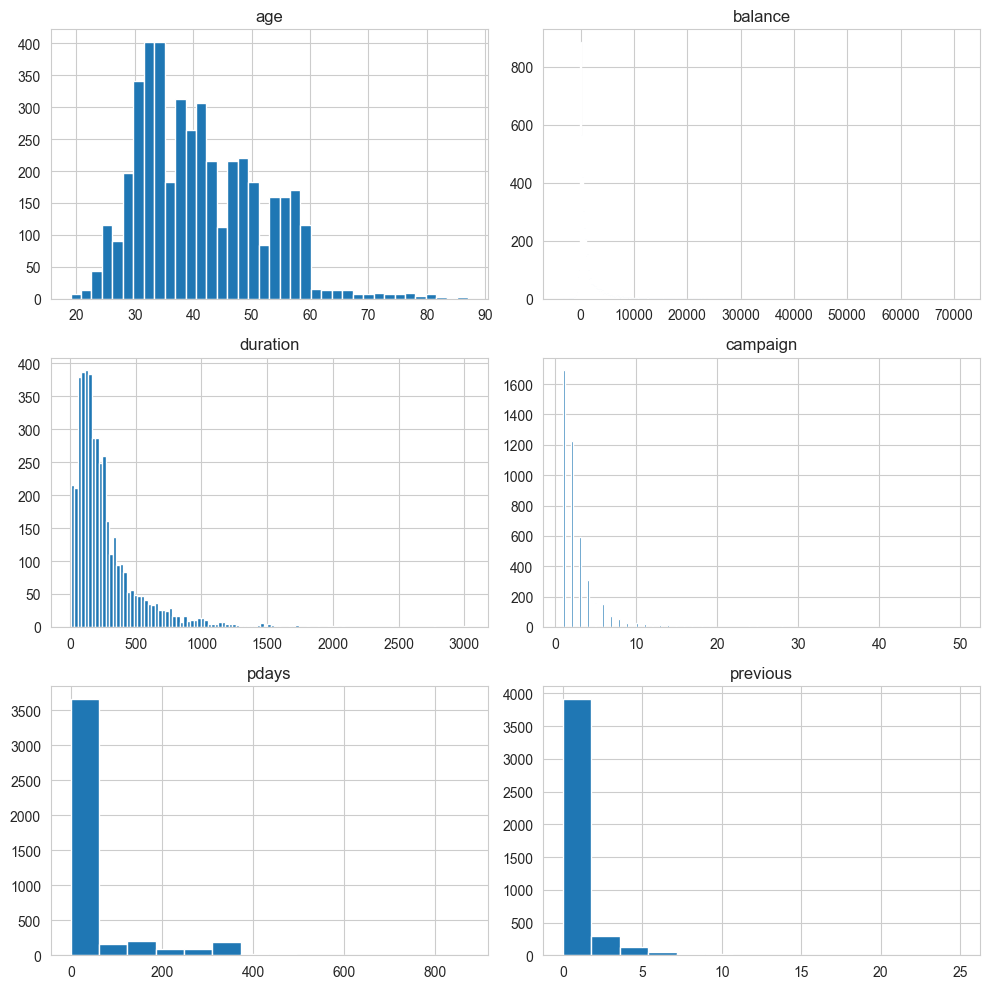

In [9]:
# Create a 4x2 grid of subplots
fig, ax = plt.subplots(3, 2,figsize=(10, 10))

# Plot histograms on each subplot
ax[0, 0].hist(df['age'], bins="auto")
ax[0, 1].hist(df['balance'], bins="auto")
ax[1, 0].hist(df['duration'], bins="auto")
ax[1, 1].hist(df['campaign'], bins="auto")
ax[2, 0].hist(df['pdays'], bins="auto")
ax[2, 1].hist(df['previous'], bins="auto")

# Set titles for each subplot
ax[0, 0].set_title('age')
ax[0, 1].set_title('balance')
ax[1, 0].set_title('duration')
ax[1, 1].set_title('campaign')
ax[2, 0].set_title('pdays')
ax[2, 1].set_title('previous')


# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

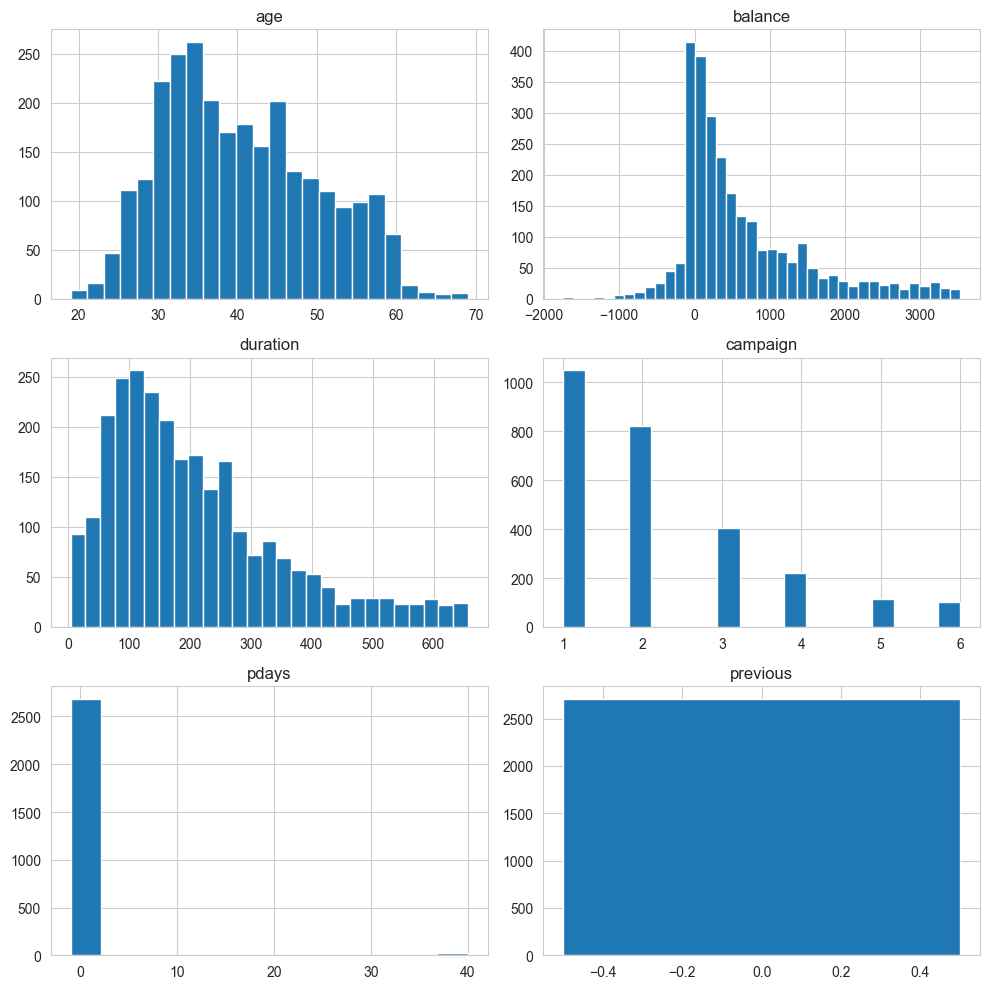

In [10]:
# Create a 4x2 grid of subplots
fig, ax = plt.subplots(3, 2,figsize=(10, 10))

# Plot histograms on each subplot
ax[0, 0].hist(df_cleaned['age'], bins="auto")
ax[0, 1].hist(df_cleaned['balance'], bins="auto")
ax[1, 0].hist(df_cleaned['duration'], bins="auto")
ax[1, 1].hist(df_cleaned['campaign'], bins="auto")
ax[2, 0].hist(df_cleaned['pdays'], bins="auto")
ax[2, 1].hist(df_cleaned['previous'], bins="auto")

# Set titles for each subplot
ax[0, 0].set_title('age')
ax[0, 1].set_title('balance')
ax[1, 0].set_title('duration')
ax[1, 1].set_title('campaign')
ax[2, 0].set_title('pdays')
ax[2, 1].set_title('previous')

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

In [11]:
df_cleaned.to_csv("cleaned_bank.csv", index=False)

In [12]:
df_cleaned["duration"].value_counts().sort_index()

duration
4      1
5      5
6      2
7      1
8      2
      ..
650    4
651    1
652    1
653    1
656    1
Name: count, Length: 570, dtype: Int64